In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read dataset
cols = ['Membership_number','Membership_term_years','Annual_fees','Member_marital_status','Member_gender',
        'Member_annual_income','Member_occupation_cd','Membership_package','Member_age_at_issue','Additional_members',
        'Payment_mode','Agent_code','Membership_status','Start_date','End_date']
df = pd.read_csv("C:/Users/peace/Desktop/ML/Membership_Data.csv", names=cols)
df.head()

,Membership_number,Membership_term_years,Annual_fees,Member_marital_status,Member_gender,Member_annual_income,Member_occupation_cd,Membership_package,Member_age_at_issue,Additional_members,Payment_mode,Agent_code,Membership_status,Start_date,End_date
0,A00001,29,113125.0,M,M,25200000,1,TYPE-B,45,2,ANNUAL,477,INFORCE,20060914,?
1,A00002,38,112220.0,M,M,10339200,1,TYPE-B,36,3,QUARTERLY,255,INFORCE,20061102,?
2,A00003,12,100000.0,M,M,14400000,1,TYPE-B,42,1,ANNUAL,7866,INFORCE,20070124,?
3,A00004,12,100000.0,M,M,9000000,1,TYPE-B,39,2,ANNUAL,200533,INFORCE,20070122,?
4,A00005,46,100000.0,M,M,4800000,1,TYPE-B,27,2,QUARTERLY,6988,INFORCE,20070131,?


In [3]:
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Membership_number      10362 non-null  object 
 1   Membership_term_years  10362 non-null  int64  
 2   Annual_fees            10362 non-null  float64
 3   Member_marital_status  10362 non-null  object 
 4   Member_gender          10362 non-null  object 
 5   Member_annual_income   10362 non-null  object 
 6   Member_occupation_cd   10362 non-null  object 
 7   Membership_package     10362 non-null  object 
 8   Member_age_at_issue    10362 non-null  int64  
 9   Additional_members     10362 non-null  int64  
 10  Payment_mode           10362 non-null  object 
 11  Agent_code             10362 non-null  object 
 12  Membership_status      10362 non-null  object 
 13  Start_date             10362 non-null  int64  
 14  End_date               10362 non-null  o

In [4]:
# Preprocessing

# Drop unnecessary columns
cols_drop = ['Member_marital_status', 'Member_gender', 'Member_occupation_cd', 'Membership_package',
                   'Member_age_at_issue', 'Payment_mode', 'Agent_code','Additional_members']

# Drop the specified columns to the dataframe
df = df.drop(labels=cols_drop, axis=1)

# replace "?" with null value
df.replace("?", np.nan, inplace=True)

# Convert "Membership_number" to String
df['Membership_number'] = df['Membership_number'].astype(str)

# use the .str accessor to convert type to int
df['Membership_number'] = df['Membership_number'].str.replace('A', '').astype(int)

# "Member_annual_income" choose numeric value
real_value = pd.to_numeric(df['Member_annual_income'], errors='coerce')
# calculate mean value
mean_income = real_value.mean()
# fill null value with mean value
df['Member_annual_income'].fillna(mean_income, inplace=True)

# "Member_annual_income" Convert float to int
df['Member_annual_income'] = df['Member_annual_income'].astype(int)
# "Convert Annual_fees" float to int
df['Annual_fees'] = df['Annual_fees'].astype(int)

# "Start_date" "End_date" Converting a date to a date format
df['Start_date'] = pd.to_datetime(df['Start_date'], format='%Y%m%d')
df['End_date'] = pd.to_datetime(df['End_date'], format='%Y%m%d')

df.head()

,Membership_number,Membership_term_years,Annual_fees,Member_annual_income,Membership_status,Start_date,End_date
0,1,29,113125,25200000,INFORCE,2006-09-14,NaT
1,2,38,112220,10339200,INFORCE,2006-11-02,NaT
2,3,12,100000,14400000,INFORCE,2007-01-24,NaT
3,4,12,100000,9000000,INFORCE,2007-01-22,NaT
4,5,46,100000,4800000,INFORCE,2007-01-31,NaT


In [5]:
from sklearn.preprocessing import StandardScaler

# Converts data extracted in separate columns into a two-dimensional array.
Data1 = df[['Annual_fees']]
Data2 = df[['Member_annual_income']]
Data3 = df[['Membership_term_years']]

# Scale data into StandardScaler
scaler = StandardScaler()
standardized_data1 = scaler.fit_transform(Data1)
standardized_data2 = scaler.fit_transform(Data2)
standardized_data3 = scaler.fit_transform(Data3)

# Save standardized data
df['Annual_fees'] = standardized_data1
df['Member_annual_income'] = standardized_data2
df['Membership_term_years'] = standardized_data3
df.head()


,Membership_number,Membership_term_years,Annual_fees,Member_annual_income,Membership_status,Start_date,End_date
0,1,-0.017613,-0.244315,1.482943,INFORCE,2006-09-14,NaT
1,2,0.383696,-0.247681,0.554996,INFORCE,2006-11-02,NaT
2,3,-0.775640,-0.293132,0.808563,INFORCE,2007-01-24,NaT
3,4,-0.775640,-0.293132,0.471373,INFORCE,2007-01-22,NaT
4,5,0.740414,-0.293132,0.209114,INFORCE,2007-01-31,NaT


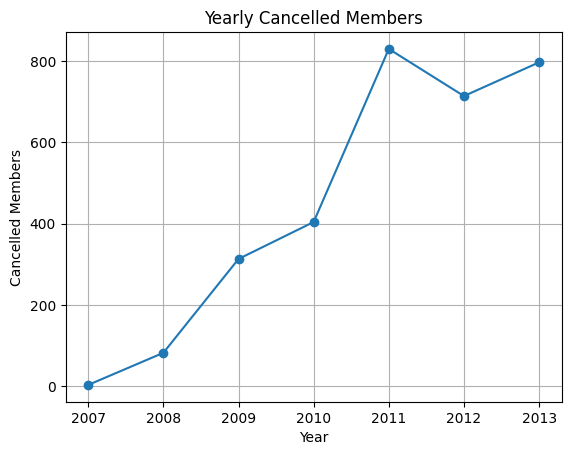

Total number of cancelled members: 3142 members


In [6]:
# Exclude rows with 'Membership_status' not equal to 'INFORCE' (cancelled members)
cancelled_members = df[df['End_date'].notnull()].copy()

# Calculate the number of cancelled members for each year
cancelled_members['Cancellation_Year'] = cancelled_members['End_date'].dt.year
cancelled_by_year = cancelled_members['Cancellation_Year'].value_counts().sort_index()

# Plot the line graph
cancelled_by_year.plot(kind='line', marker='o')
plt.title('Yearly Cancelled Members')
plt.xlabel('Year')
plt.ylabel('Cancelled Members')
plt.grid(True)
plt.show()

# Exclude rows with 'Membership_status' not equal to 'INFORCE' (cancelled members)
cancelled_members = df[df['End_date'].notnull()].copy()

# Calculate the number of cancelled members for each year
cancelled_members['Cancellation_Year'] = cancelled_members['End_date'].dt.year
cancelled_by_year = cancelled_members['Cancellation_Year'].value_counts().sort_index()

# Total number of cancelled members (-1 for column 0 issue)
total_cancelled = cancelled_by_year.sum() - 1

print("Total number of cancelled members:", total_cancelled, "members")


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Encoding categorical variables to numbers
label_encoder = LabelEncoder()
df['Membership_status'] = label_encoder.fit_transform(df['Membership_status'])

# Select as dependent and independent variable (slicing)
X = df.iloc[:, 1:4]  # Membership_term_years, Annual_fees, Member_annual_income
y = df.iloc[:, 4:5]  # Membership_status

y = y.values.ravel()  # Converting to a one-dimensional array

# Data Segmentation: Learning Data and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
rfc_train_score = rf_model.score(X_train, y_train)
rfc_test_score = rf_model.score(X_test, y_test)

# 2. Logistic Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_train_score = logistic_reg.score(X_train, y_train)
logistic_test_score = logistic_reg.score(X_test, y_test)

# SVM model
model = SVC(kernel='rbf') 
model.fit(X_train, y_train)
SVC_train_score = model.score(X_train, y_train)
SVC_test_score = model.score(X_test, y_test)

# RFC train and test score
print("Random Forest Classifier Training Score: {:.3f}".format(rfc_train_score))
print("Random Forest Classifier Testing Score: {:.3f}".format(rfc_test_score))
# LR train and test score
print("Logistic Regression Training Score: {:.3f}".format(logistic_train_score))
print("Logistic Regression Testing Score: {:.3f}".format(logistic_test_score))
# SVC train and test score
print("SVC Training Score: {:.3f}".format(SVC_train_score))
print("SVC Testing Score: {:.3f}".format(SVC_test_score))


Random Forest Classifier Training Score: 0.892
Random Forest Classifier Testing Score: 0.682
Logistic Regression Training Score: 0.695
Logistic Regression Testing Score: 0.699
SVC Training Score: 0.699
SVC Testing Score: 0.702


In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

# set hyperparameters for tuning
param_dist = {
    'n_estimators': randint(10, 100), 
    'max_depth': randint(2, 20), 
    'min_samples_split': randint(2, 20),  
    'min_samples_leaf': randint(1, 10) 
}

# Random Forest Model
rf_model = RandomForestClassifier(random_state=0)

# Randomized Search
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Best Parameter
print("Best Parameter:", random_search.best_params_)

# Using best parameter for train and test score
train_score = random_search.best_estimator_.score(X_train, y_train)
print("Best train score: {:.3f}".format(train_score))
test_score = random_search.best_estimator_.score(X_test, y_test)
print("Best test score: {:.3f}".format(test_score))


Best Parameter: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 84}
Best train score: 0.723
Best test score: 0.703


Random Forest Classifier Confusion Matrix:
[[  73  704]
 [  65 1749]]


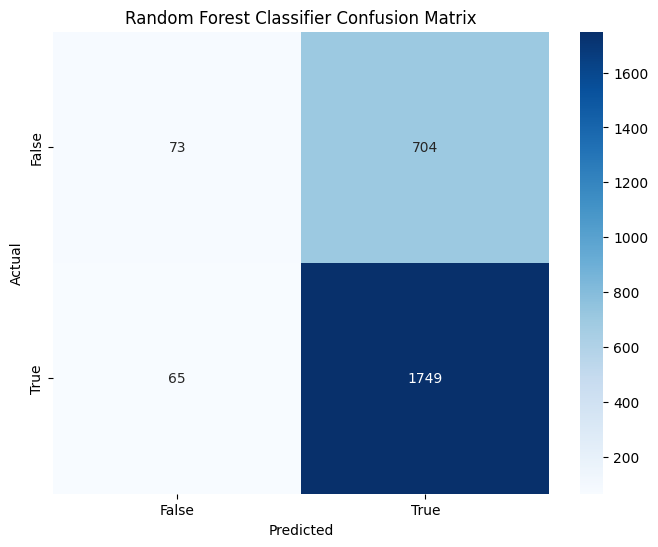

Support Vector Classifier Confusion Matrix:
[[  11  766]
 [   7 1807]]


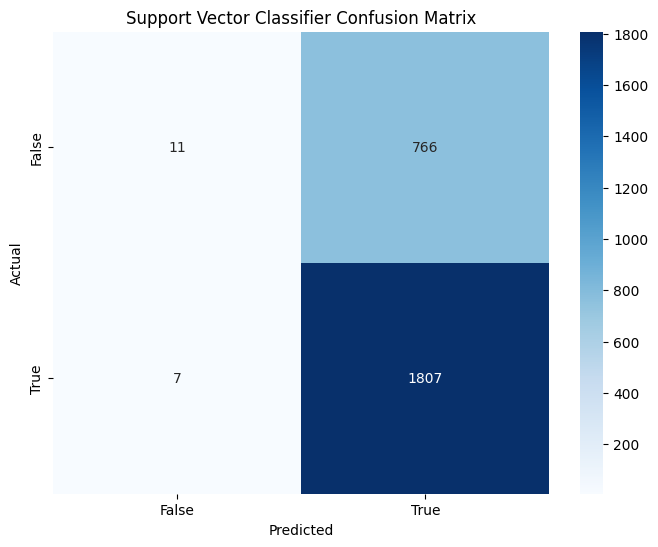

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions from the Random Forest model
y_pred_rf = random_search.best_estimator_.predict(X_test)

# Create the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Add labels
labels = ['False', 'True']

# Print the confusion matrix for Random Forest
print("Random Forest Classifier Confusion Matrix:")
print(cm_rf)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

# Get predictions from the Support Vector Classifier model
y_pred_svc = model.predict(X_test)

# Create the confusion matrix for Support Vector Classifier
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Print the confusion matrix for Support Vector Classifier
print("Support Vector Classifier Confusion Matrix:")
print(cm_svc)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Classifier Confusion Matrix')
plt.show()

In [10]:
# SVC Model
TP = 1807
TN = 766
FP = 7
FN = 11

# Precision Calculation
precision = TP / (TP + FP)

# Recall Calculation
recall = TP / (TP + FN)

# F1 Calculation
f1_score = 2 * (precision * recall) / (precision + recall)

print("SVC Model Scores")
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1_score))

SVC Model Scores
Precision: 0.996
Recall: 0.994
F1 Score: 0.995
